# **Resolucion de mapas y obntencion de camino minimo**

Utilizacion de algoritmos A* y Dijkstra (Son muy similares)

Pruebas de algoritmos para mapeo, obtención de caminos y slam

In [74]:
class Node:
	def __init__(self, name, pos, parent = None):
		self.name = name
		self._x = pos[0]
		self._y = pos[1]
		self.connected_nodes = []
		self.open = True

		# Valores desde la entrada al nodo actual
		self.parent = parent		# 0
		self.g = float('inf')
		self.h = 0

	@property
	def f(self):	# f= g + h . g=valor camino. h= distancia aprox a la salida.
		return self.g + self.h	

	def __lt__(self, other: 'Node'):  # necesario para heapq. Less than Node1 < Node2
		return self.f < other.f

	def connect(self,Node, peso):
		self.connected_nodes.append((Node, peso))
	
	def __repr__(self):
		return f"Node({self.name})"





def heuristica(nodo: Node, destino: Node ):			##Función de cálculo de H. Puede cambiar dependiendo de la aplicación
	dist = ((nodo._x - destino._x)**2 + (nodo._y-destino._y)**2)**0.5
	return dist



In [110]:
import heapq
def Dijkstra(start: Node , stop: Node):
	start.g = 0
	lista_nodos = [(0,start)]

	nodos_visitados = set()

	while lista_nodos:
		costo_acumulado, nodo_actual = heapq.heappop(lista_nodos)

		if not nodo_actual.open:
			continue
		nodo_actual.open = False
		
		if nodo_actual == stop:		## Si ya estoy en el final o el final ya es el camino más corto de mi lista, no vale la pena seguir.
			break
		if costo_acumulado > nodo_actual.g:
			continue

		for vecino, peso in nodo_actual.connected_nodes:
			if not vecino.open:
				continue

			suma_camino = costo_acumulado + peso
			if suma_camino < vecino.g :
				vecino.g = suma_camino
				vecino.parent = nodo_actual
				heapq.heappush(lista_nodos,(suma_camino,vecino))
	
	print('termine')



def A_star(start: Node , stop: Node):
	start.g = 0
	start.h = heuristica(start, stop)
	lista_nodos = [(0,start)]


	while lista_nodos:
		_, nodo_actual = heapq.heappop(lista_nodos)

		if not nodo_actual.open:
			continue
		nodo_actual.open = False

		if nodo_actual == stop:		## Si ya estoy en el final o el final ya es el camino más corto de mi lista, no vale la pena seguir.
			break

		for vecino, peso in nodo_actual.connected_nodes:
			if not vecino.open:
				continue
			suma_camino = nodo_actual.g + peso
			if suma_camino < vecino.g :
				vecino.g = suma_camino
				vecino.parent = nodo_actual
				heapq.heappush(lista_nodos,(vecino.f, vecino))

def get_path(stop: Node):
	path= []
	aux = stop
	while aux is not None:
		path.append(aux)
		aux = aux.parent
	
	path.reverse()
	return path

In [113]:
##Creo el mapa
import networkx as nx
import matplotlib.pyplot as plt
def crear_mapa():
	global a, b, c, d, e, f, g
	# Tus nodos
	a = Node('A', (0, 0))
	b = Node('B', (1, 0))
	c = Node('C', (1, 1))
	d = Node('D', (2, 1))
	e = Node('E', (3, 3))
	f = Node('F', (3, -1))
	g = Node('G', (3, 5))


	# Agregar aristas con peso
	a.connect(b, 1)
	a.connect(c, 2)
	b.connect(c, 2)
	b.connect(d, 1)
	c.connect(d, 1)

	c.connect(e, 2)
	b.connect(e, 4)
	e.connect(f, 3)
	e.connect(g, 6)
	f.connect(a, 10)
	e.connect(d, 15)

	#Chiche para ver conectados los nodos
	G = nx.DiGraph()	#Grafo

	for n in [a, b, c, d, e, f, g]:				#Agrego nodos
		G.add_node(n.name, pos=(n._x, n._y))

	for nodo in [a, b, c, d, e, f, g]:				#Agrego aristas
		for destino, peso in nodo.connected_nodes:
			G.add_edge(nodo.name, destino.name, weight=peso)

	# Dibujo
	pos = nx.get_node_attributes(G, 'pos')
	labels = nx.get_edge_attributes(G, 'weight')

	nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=500, font_size=15, font_weight='bold')
	nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
	plt.show()


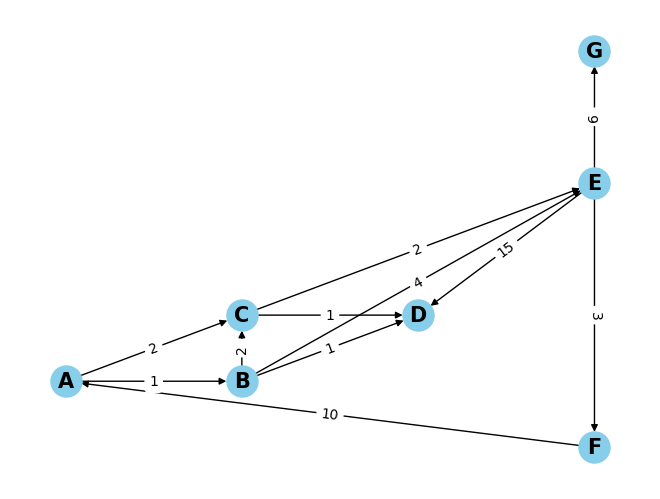

A -> C -> E -> F
camino de peso: 7


In [115]:
crear_mapa()
origen = a
destino = f

# Ejecutar algoritmo de resolucion del mapa
# Dijkstra(origen, destino)
A_star(origen, destino)


# Mostrar camino desde A hasta D
camino = get_path(destino)
print(" -> ".join(n.name for n in camino))  # Debería ser: A -> B -> C -> D
print(f"camino de peso: {destino.g}")


**Problema:**


heapq no actualiza los valores en su tabla, siempre agrega punteros nuevos. 
Utilizar un método que solo agregue si no se encuentra dentro y que actualice sus valores parecería mas correcto

**Ej de solucion:**


Reemplazar:
heapq.heappush(lista_nodos,(suma_camino,vecino))

por:

Lista de valores únicos (como set())

Realizar un sort siempre que se agregue algo.



lista_nodos = set()	

lista_nodos.add(vecino)

sortby(lista_nodos, f)		//La lista debería sortearse de menor a mayor f

**2da solucion:**

Realizar el codigo en C++. Utilziar referencia para evitar copias y mejorar el algoritmo.
Utilizar una lista enlazada ordenada automáticamente por peso. 

La lista guardará los valores ya ordenados. En caso de que un valor cambie su prioridad on the fly se podria crear una funcion update() o sort() que actualice la lista. El update debería ser rápido puesto que pocos elementos dentro de la lista debieron cambiar su prioridad.

# **Fusión de muestras y predicciones. Filtro de Kalman**


Idea de kalman básica:

x: valor a calcular.

x se puede predecir (por ecuaciones físicas, por ejemplo o relacionado con otros estados).
x se está midiendo directamente con sensores.


ambos tienen, medicion y predicción tienen error.


Kalman tiene 3 partes: predecir, corregir y actualizar la prediccion.


Predecir:
x_nuevo = x_prediccion
error = err_prediccion

Corregir:
K: Ganancia de Kalman
K= err_prediccion/(err_prediccion + err_sensor)

Actualizacion:
x_nuevo = x_prediccion + K * (medicion - x_prediccion)
error = (1 - K) * err_prediccion

Así, se obtienen mejores valores, en especial cuando el x predicho tiene relación con el anterior. De esta forma Kalman se vuelve recursivo y disminuye el error.

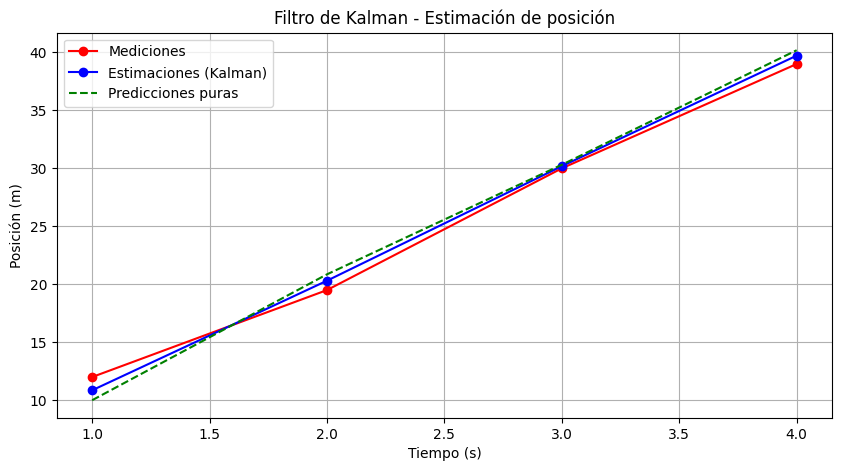

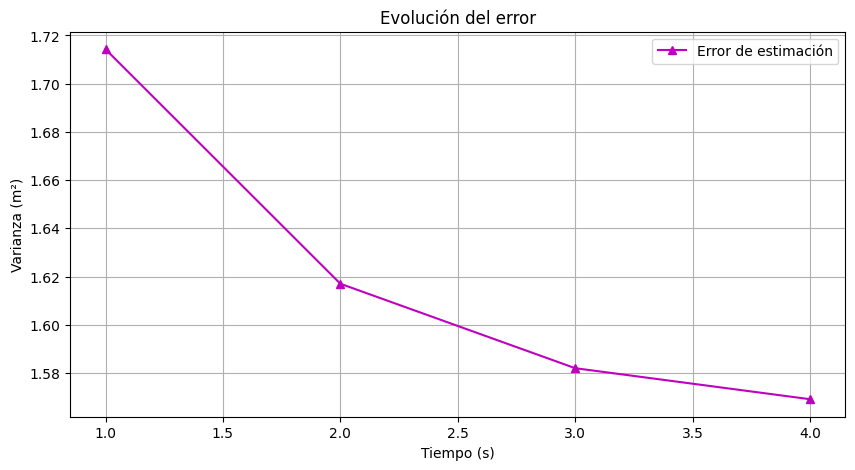

In [1]:
import matplotlib.pyplot as plt

# Inicialización
x = 0.0
error = 2.0
v = 10.0
error_sensor = 4.0
error_movimiento = 1.0
dt = 1.0

# Mediciones simuladas
mediciones = [12.0, 19.5, 30.0, 39.0]

# Listas para guardar resultados
estimaciones = []
errores = []
pos_predichas = []

for z in mediciones:
    # 1. Predicción
    x_predicho = x + v * dt
    error_predicho = error + error_movimiento

    # 2. Medición

    # 3. Ganancia de Kalman
    K = error_predicho / (error_predicho + error_sensor)

    # 4. Actualización
    x = x_predicho + K * (z - x_predicho)

    # 5. Actualización del error
    error = (1 - K) * error_predicho

    # 6. Guardar resultados
    estimaciones.append(x)
    errores.append(error)
    pos_predichas.append(x_predicho)

# Eje de tiempo
tiempos = list(range(1, len(mediciones)+1))

# Graficar posiciones
plt.figure(figsize=(10,5))
plt.plot(tiempos, mediciones, 'ro-', label='Mediciones')
plt.plot(tiempos, estimaciones, 'bo-', label='Estimaciones (Kalman)')
plt.plot(tiempos, pos_predichas, 'g--', label='Predicciones puras')
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición (m)')
plt.title('Filtro de Kalman - Estimación de posición')
plt.legend()
plt.grid(True)
plt.show()

# (opcional) Graficar error
plt.figure(figsize=(10,5))
plt.plot(tiempos, errores, 'm^-', label='Error de estimación')
plt.xlabel('Tiempo (s)')
plt.ylabel('Varianza (m²)')
plt.title('Evolución del error')
plt.legend()
plt.grid(True)
plt.show()


Caso más avanzado:

Ahora tengo 3 estados
estado = [posición, velocidad, aceleración]  
<br />
Por lo tanto se trabaja con matrices: 
<br />
X_nuevo = F * X_viejos
var_nuevo = H * var_viejo + var_predict  
<br />
K= err_prediccion/(err_prediccion + err_sensor)  
<br />
x_nuevo = X_nuevo + K (medicion - x_nuevo)
var_nuevo = (1 - K) * err_prediccion  
<br />
<br />
F: matriz de prediccion. Tiene las relaciones entre estados viejos para poder predecir los nuevos.
H: Matriz de observación. Se indica a qué estado corresponde cada medición o a ninguno.  
Ej:  
X:  
| pos |  
|-----|  
| vel |  

medimos solo posición:  
H:  
| 1 | 0 |  
|---|---|  

medimos posición y velocidad:  
H:  
| 1 | 0 |  <- medición 1 (pos)  |
|---|---|  -----| 
| 0 | 1 |  <- medición 2 (vel)  |

medimos posición con 2 sensores:  
H:  
| 1 | 0 |  <- medición 1 (pos)  |
|---|---|  -----| 
| 1 | 0 |  <- medición 2 (pos)|


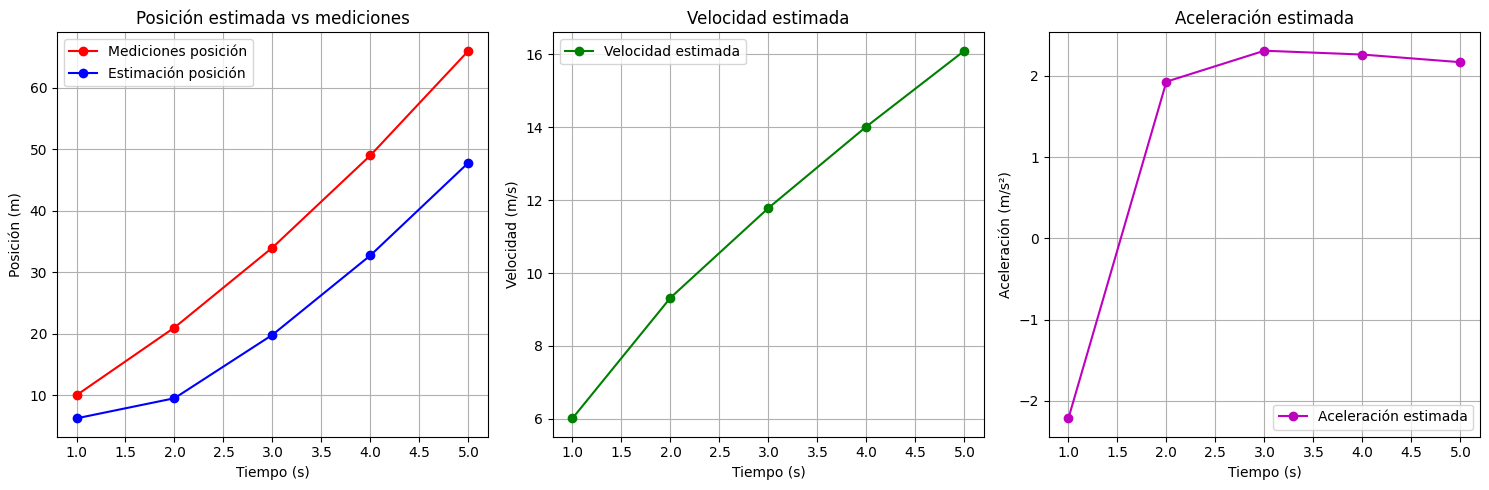

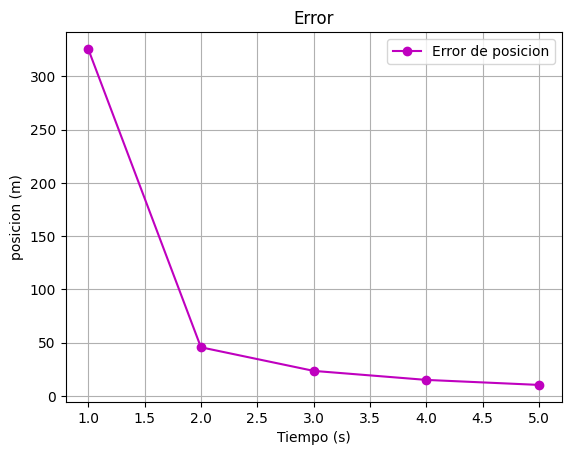

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Inicialización
dt = 1.0  # intervalo de tiempo (s)

# Estado inicial: posición = 0, velocidad = 10 m/s, aceleración = 0 m/s²
x = np.array([[0.0],   # posición
              [10.0],  # velocidad
              [0.0]])  # aceleración

# Incertidumbre inicial
var = np.eye(3) * 500

# Matriz de predicción (modelo de movimiento)
F = np.array([[1, dt, 0.5*dt**2],
              [0, 1,  dt],
              [0, 0,  1]])

# Matriz de medición (solo posición medida)
H = np.array([[1, 1, 1]])

# Error del sensor (posición)
var_medicion = np.array([[20]])

# Error del modelo (incertidumbre en movimiento)
var_predict = np.eye(3) * 1

# Mediciones simuladas
mediciones = [10.0, 21.0, 34.0, 49.0, 66.0]

# Listas para guardar resultados
estimaciones_pos = []
estimaciones_vel = []
estimaciones_acc = []
errores = []
tiempos = list(range(1, len(mediciones) + 1))

for z in mediciones:
    # ----- Predicción -----
    x = F @ x
    var = F @ var @ F.T + var_predict

    # ----- Calculo kalman -----
    z = np.array([[z]])
    
    var_suma = H @ var @ H.T + var_medicion                     
    K = var @ H.T @ np.linalg.inv(var_suma)           # Ganancia de Kalman
    
	# ----- Actualización -----
    x = x + K @ (z - H @ x)                      # Actualizar estado
    var = (np.eye(3) - K @ H) @ var              # Actualizar incertidumbre

    # Guardar resultados
    estimaciones_pos.append(x[0,0])
    estimaciones_vel.append(x[1,0])
    estimaciones_acc.append(x[2,0])
    errores.append(var[0,0])

# Graficar resultados
plt.figure(figsize=(15,5))

# Posición
plt.subplot(1, 3, 1)
plt.plot(tiempos, mediciones, 'ro-', label='Mediciones posición')
plt.plot(tiempos, estimaciones_pos, 'bo-', label='Estimación posición')
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición (m)')
plt.title('Posición estimada vs mediciones')
plt.legend()
plt.grid(True)

# Velocidad
plt.subplot(1, 3, 2)
plt.plot(tiempos, estimaciones_vel, 'go-', label='Velocidad estimada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad (m/s)')
plt.title('Velocidad estimada')
plt.legend()
plt.grid(True)

# Aceleración
plt.subplot(1, 3, 3)
plt.plot(tiempos, estimaciones_acc, 'mo-', label='Aceleración estimada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Aceleración (m/s²)')
plt.title('Aceleración estimada')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

plt.plot(tiempos, errores, 'mo-', label='Error de posicion')
plt.xlabel('Tiempo (s)')
plt.ylabel('posicion (m)')
plt.title('Error')
plt.legend()
plt.grid(True)


**Varaibles clasicas de kalman:**

x: Estados, valores que cambian.
P: Incertidumbre de x. Esta se calcula y acutaliza con las predicciones.

f: Matriz de evolucion del sistema. F * x_anterior = x_nuevo. Son las ecuaciones fisicas que predicen el movimiento.
Q: Ruido del modelo. Ruido añadido al agregar una predicción.

Mediciones: No tienen nombre especial. Son las mediciones.
R: Incertidumbre de la medición.

H: Matriz de medición. Indica qué valores mido y cuales solo predico. (1: mido, 0: solo prediccion)


In [ ]:
def Kalman(x, P, F, Q, medicion, R, H ):
	"""
		Filtro de Kalman
		Genera el filtro de Kalman con los valores entregados. Realiza la combinación entre la medición y la predicción de un valor o ESTADO.
		Parámetros:
			x (float o numpy.array): Estado/variables a estimar. La matriz es de N x 1
			P (float o numpy.array): Varianza o covarianza anterior. Tiene los errores asociados a cada x. matriz N x N
			F (float o numpy.array): Matriz de transición de estado. x*F entrega el nuevo valor de x (prediccion). Matriz N x N
			Q (float o numpy.array): Matriz de covarianza del ruido de proceso. El error agregado en cada predicción. N x N
			medicion (float o numpy.array): Matriz con los estados MEDIDOS. Matriz  M x 1
			R (float o numpy.array): Matriz de covarianza de la medicion. Error de la medicion. Matriz M X M 
			H (float o numpy.array): Matriz de observación. Indica a qué estado x corresponde cada medición. solo tiene 1 o 0. Matriz M x N
	"""
	x_nuevo = F @ x
	var_nuevo = F @ P @ F.T + Q

	# ----- Calculo kalman -----
	K = var_nuevo @ H.T @ np.linalg.inv(H @ var_nuevo @ H.T + R)           # Ganancia de Kalman

	# ----- Actualización -----
	x_nuevo = x_nuevo + K @ (medicion - H @ x_nuevo)                      # Actualizar estado
	var_nuevo = (np.eye(3) - K @ H) @ var_nuevo              # Actualizar incertidumbre

	return x_nuevo, var_nuevo
